<a href="https://colab.research.google.com/github/AnnaPaulaFigueiredo/Imersao-Dados-Alura/blob/main/Dia1Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

data = pd.read_csv(fonte)


Desafio 1: Fazer a proporção em % dos inscritos por idade.

In [ ]:
# Selecionando as colunas que desejo trabalhar
proporcaoIdade = pd.DataFrame(columns=["IDADE", "QUANTIDADE", "PROPORCAO"] )

# Fazendo as alterações e o calculo da porcentagem
proporcaoIdade["IDADE"] = data["NU_IDADE"].value_counts().index
proporcaoIdade["QUANTIDADE"] = data["NU_IDADE"].value_counts().values
proporcaoIdade["PROPORCAO"] = ((proporcaoIdade["QUANTIDADE"] * 100) / proporcaoIdade["QUANTIDADE"].sum())

proporcaoIdade.head()

,IDADE,QUANTIDADE,PROPORCAO
0,18,21452,16.840948
1,17,21256,16.687078
2,19,14418,11.318888
3,20,10413,8.174753
4,16,7830,6.146962


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <a list of 65 Text major ticklabel objects>)

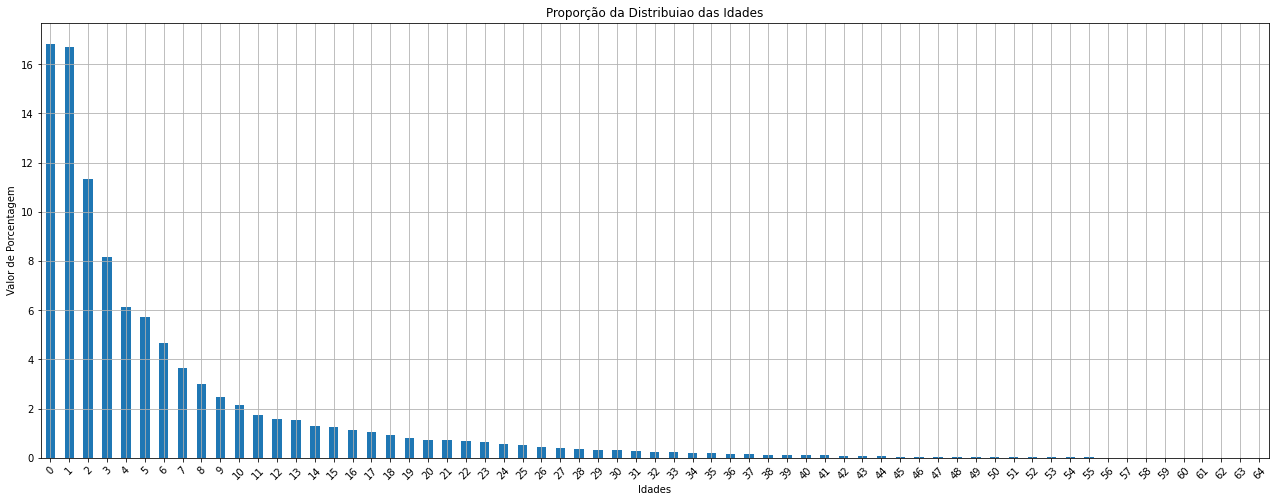

In [ ]:
# Plotando o gráfico da distribuição de porcentagem
plt.title("Proporção da Distribuiao das Idades")
plt.xlabel("Idades")
plt.ylabel("Valor de Porcentagem")
proporcaoIdade["PROPORCAO"].plot.bar(grid = True, figsize=(22, 8))
plt.xticks(rotation=45)


Desafio 2: Descobrir de quais estados são os inscritos com 13 anos.

In [ ]:
data.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"]

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

Desafio 3: Colocar título no gráfico de distribuição por idade.

Text(0.5, 1.0, 'Distribuição das Idades')

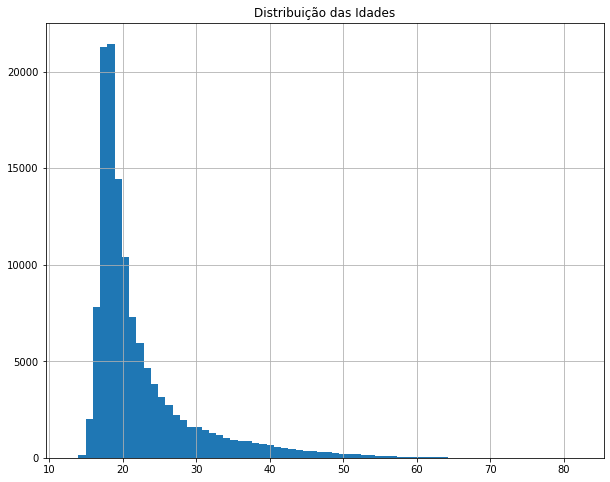

In [ ]:
data["NU_IDADE"].hist(bins=70, figsize=(10,8)).set_title("Distribuição das Idades")

Desafio 4: Plotar o histograma dos treineiros e não treneiros, no mesmo plot, com cores diferentes para diferenciar.

In [ ]:
treineirosNtreineiros = pd.DataFrame(columns=["IDADE", "QUANTIDADE", "TREINEIRO"] )

treineirosNtreineiros["IDADE"] = data["NU_IDADE"]
treineirosNtreineiros["TREINEIRO"] = data["IN_TREINEIRO"]

x0 = treineirosNtreineiros.query("TREINEIRO == 0")["IDADE"]
x1 = treineirosNtreineiros.query("TREINEIRO == 1")["IDADE"]

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, name='Não Treineiro',  opacity=0.75))
fig.add_trace(go.Histogram(x=x1, name='Treineiro', ))


fig.update_layout(barmode='stack', title_text='Histograma dos Treineiros e Não Treineiros ENEM 2019', 
    xaxis_title_text='Idade', 
    yaxis_title_text='Quantidade', 
    bargap=0.1, 
    bargroupgap=0.1 )
fig.show()



In [ ]:

x0 = treineirosNtreineiros.query("TREINEIRO == 0")["IDADE"]
x1 = treineirosNtreineiros.query("TREINEIRO == 1")["IDADE"]

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, name='Não Treineiro'))
fig.add_trace(go.Histogram(x=x1, name='Treineiro', ))


fig.update_layout(barmode='group', title_text='Histograma dos Treineiros e Não Treineiros ENEM 2019', 
    xaxis_title_text='Idade', 
    yaxis_title_text='Quantidade', 
    bargap=0.1, 
    bargroupgap=0.1 )
fig.show()

Desafio 5: Comparar as distribuições das provas em inglês espanhol

In [ ]:
# Adicionando coluna com o total de notas
exame = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

data["NU_NOTA_TOTAL"] = data[exame].sum(axis=1)

# Separando das notas zero
data = data.query("NU_NOTA_TOTAL != 0")

In [ ]:
x0 =  data.query("TP_LINGUA == 0")["NU_NOTA_LC"].values
x1 = data.query("TP_LINGUA == 1")["NU_NOTA_LC"].values

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, name="Inglês"))
fig.add_trace(go.Histogram(x=x1, name="Espanhol"))

fig.update_layout(barmode='overlay', title_text='Distribuição das Notas de Inglês e Espanhol', 
    xaxis_title_text='Notas', 
    yaxis_title_text='Frequencia', 
    bargap=0.1, 
    bargroupgap=0.1 )

fig.update_traces(opacity=0.75)
fig.show()


In [ ]:

fig = go.Figure()

fig.add_trace(go.Box(y=x0, name="Inglês", marker_color = 'indianred'))
fig.add_trace(go.Box(y=x1, name="Espanhol", marker_color = 'lightseagreen'))

fig.show()